# Test Data Generation for Multi and Binary Class Models

This is just a file to generate a testing set for every model from the configs.

The training/testing data that the models train on is completely shuffled and therefore it is difficult to extract samples with specific noise and frequency values.

Therfore we pick out a couple of relevant testing sets to analyze the models inner workings better.

In [1]:
import numpy as np

import os
import sys
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get the current working directory (where your notebook is)
current_directory = os.getcwd()

# Construct the full path to your data_utils.py file
analysis_utils_path = '/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Thesis Files/'  # Replace with the actual path

# Add the directory containing data_utils.py to the Python path
sys.path.append(os.path.dirname(analysis_utils_path))  # Add parent directory of data_utils.py

# Now you can import the custom module
# import data_utils as du
import analysis_utils as au
import data_utils as du

sys.path = []

In [ ]:
# ONLY FOR RELOAD!

# Reloads if the data_utils has been updated during runtime
# Always need to add and reset the paths
import importlib

# Add the directory containing data_utils.py to the Python path
sys.path.append(os.path.dirname(analysis_utils_path))  # Add parent directory of data_utils.py

importlib.reload(du)  # This reloads the module
importlib.reload(au)  # This reloads the module

sys.path = []

In [4]:
# Loading the Model Configuations Dictionary

configs_base_path = "/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/Model Configurations/"
config_file_binary_path = f"{configs_base_path}model_configs_binary_multi_noise.json"
config_file_multiple_path = f"{configs_base_path}model_configs_multiple.json"

In [14]:
model_configs_multiple = du.load_data_configs_json(config_file_multiple_path)
model_configs_binary = du.load_data_configs_json(config_file_binary_path)

# Choice between binary or multiclass data processing
data_configs = model_configs_multiple
data_configs.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [16]:
sample_config = data_configs["all_features_multi"]
sample_config

{'data_path': '/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/Including Features/5_class_mid_noise_30s_features_vec.npy',
 'label_path': '/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/Including Features/5_class_mid_noise_30s_numeric_label_vec.npy',
 'n_samples': 10,
 'feature_vals': [0, 25]}

In [7]:
data_configs["beta_binary_signal_deep"] = data_configs["beta_binary_signal"]


In [17]:
data_configs.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

### Data Loading A (Binary Standard Sample Set)

In [8]:
# This will already load the large data sets
# That way one will know whether theres an issue with it

data, labels = du.load_data(sample_config["data_path"], sample_config["label_path"])

#data_features, label_features = du.load_data(data_configs["high_noise_beta_multiple"]["data_path"], data_configs["high_noise_beta_multiple"]["label_path"])

val_data = data[-2:]
val_labels = labels[-2:]

print(data.shape)
print(labels.shape)
print(val_data.shape)
print(val_labels.shape)

(10, 20, 5, 7500, 25)
(10, 20, 5, 7500)
(2, 20, 5, 7500, 25)
(2, 20, 5, 7500)


In [11]:
import numpy as np

def reshape_combine_first_two(array):
    """
    Reshapes an array to combine the first two dimensions.

    Args:
        array (NumPy array): The input array.

    Returns:
        NumPy array: The reshaped array.
    """
    # Get the original shape of the array
    original_shape = array.shape

    # Calculate the new shape
    new_shape = (original_shape[0] * original_shape[1],) + original_shape[2:]
    # original_shape[2:] gets all dimensions after the first two

    # Reshape the array
    reshaped_array = array.reshape(new_shape)

    return reshaped_array

In [ ]:
# data_dict = du.create_data_dict(data_configs, universal_data=val_data, universal_label=val_labels)

data_dict = {}
config_names = list(data_configs.keys())  # Use all configs if not specified

for config_name in config_names:
        config = data_configs[config_name]

        # Select data using configuration
        label_data, signal_data = du.select_data(data_config=config, data_vec=val_data, label_vec=val_labels)

        label_data = reshape_combine_first_two(label_data)
        signal_data = reshape_combine_first_two(signal_data)

        data_dict[config_name] = (signal_data, label_data)

In [ ]:
data_dict.keys()

In [ ]:
# For BETA BINARY DATA ONLY
beta_hilbert_incl_index = [0,3]
beta_hilbert_only_index = [3]
beta_wavelet_incl_index = [0,12,13,14,15,16]
beta_wavelet_only_index = [12,13,14,15,16]
beta_allF_index         = beta_hilbert_incl_index + beta_wavelet_only_index

# Convert the tuple to a list, modify the list, then convert it back to a tuple
temp_list = list(data_dict['beta_binary_hilbert_included'])
temp_list[0] = temp_list[0][:, :, :,beta_hilbert_incl_index]
data_dict['beta_binary_hilbert_included'] = tuple(temp_list)

# Do the same for the other keys
temp_list = list(data_dict['beta_binary_hilbert_only'])
temp_list[0] = temp_list[0][:, :, :,beta_hilbert_only_index]
data_dict['beta_binary_hilbert_only'] = tuple(temp_list)

temp_list = list(data_dict['beta_binary_wavelet_included'])
temp_list[0] = temp_list[0][:, :, :,beta_wavelet_incl_index]
data_dict['beta_binary_wavelet_included'] = tuple(temp_list)

temp_list = list(data_dict['beta_binary_wavelet_only'])
temp_list[0] = temp_list[0][:, :, :,beta_wavelet_only_index]
data_dict['beta_binary_wavelet_only'] = tuple(temp_list)

temp_list = list(data_dict['beta_binary_all_features'])
temp_list[0] = temp_list[0][:, :, :,beta_allF_index]
data_dict['beta_binary_all_features'] = tuple(temp_list)

print(data_dict['beta_binary_hilbert_included'][0].shape)
print(data_dict['beta_binary_hilbert_only'][0].shape)
print(data_dict['beta_binary_wavelet_included'][0].shape)
print(data_dict['beta_binary_wavelet_only'][0].shape)
print(data_dict['beta_binary_all_features'][0].shape)

### Data Loading B (Multi Standard Dataset)

In [114]:
# This will already load the large data sets
# That way one will know whether theres an issue with it

data, labels = du.load_data(sample_config["data_path"], sample_config["label_path"])

#data_features, label_features = du.load_data(data_configs["high_noise_beta_multiple"]["data_path"], data_configs["high_noise_beta_multiple"]["label_path"])

val_data = data[-1:]
val_labels = labels[-1:]

print(data.shape)
print(labels.shape)
print(val_data.shape)
print(val_labels.shape)

(10, 20, 5, 7500, 25)
(10, 20, 5, 7500)
(1, 20, 5, 7500, 25)
(1, 20, 5, 7500)


In [115]:
# data_dict = du.create_data_dict(data_configs, universal_data=val_data, universal_label=val_labels)

data_dict = {}
config_names = list(data_configs.keys())  # Use all configs if not specified

for config_name in config_names:
        config = data_configs[config_name]

        # Select data using configuration
        label_data, signal_data = du.select_data(data_config=config, data_vec=val_data, label_vec=val_labels)

        label_data = reshape_combine_first_two(label_data)
        signal_data = reshape_combine_first_two(signal_data)

        data_dict[config_name] = (signal_data, label_data)

In [116]:
data_dict.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [117]:
# For MULTI CAT DATA ONLY

all_index = list(range(0,25))
indices_to_remove = [1,2,3,4]
wavelet_incl_index = [x for x in all_index if x not in indices_to_remove]
print(wavelet_incl_index)

# Convert the tuple to a list, modify the list, then convert it back to a tuple
temp_list = list(data_dict['wavelet_inlcuded_multi'])
temp_list[0] = temp_list[0][:, :, :,wavelet_incl_index]
data_dict['wavelet_inlcuded_multi'] = tuple(temp_list)

for key in data_dict.keys():
  print(key,data_dict[key][0].shape)

[0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
all_features_multi (20, 5, 7500, 25)
signal_multi (20, 5, 7500, 1)
hilbert_only_multi (20, 5, 7500, 4)
hilbert_included_multi (20, 5, 7500, 5)
wavelet_only_multi (20, 5, 7500, 20)
wavelet_inlcuded_multi (20, 5, 7500, 21)


### Data Loading C (Multi Special Dataset - all Cats in one)

In [78]:
base_path = "/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/"

data_path = f"{base_path}5_class_test_burst_vec.npy"
label_path = f"{base_path}5_class_test_label_vec.npy"
test_data_vec = np.load(f"{base_path}5_class_test_feature_vec.npy")

data_vec, label_vec = du.load_data(data_path, label_path)

print(data_vec.shape)
print(label_vec.shape)

# Assuming burst_vec has shape (5, 4, 750)
new_burst_vec = data_vec.reshape(data_vec.shape[0], data_vec.shape[1] * data_vec.shape[2])
new_label_vec = label_vec.reshape(label_vec.shape[0], label_vec.shape[1] * label_vec.shape[2])
new_burst_vec = test_data_vec

print(test_data_vec.shape)
print(new_label_vec.shape)

(5, 4, 500)
(5, 4, 500)
(5, 2000, 25)
(5, 2000)


In [79]:
target_size = 7500  # Desired size of the second dimension

full_repetitions = int(target_size // new_burst_vec.shape[1])  # Floor division
remainder = target_size % new_burst_vec.shape[1]
print(full_repetitions, remainder)

# Concatenate full repetitions
new_burst_vec = np.concatenate([new_burst_vec] * full_repetitions, axis=1)
new_label_vec = np.concatenate([new_label_vec] * full_repetitions, axis=1)

# Handle the fractional repetition by taking a slice
fractional_data = new_burst_vec[:, :remainder]
fractional_label = new_label_vec[:, :remainder]

# Concatenate the fractional part
new_burst_vec = np.concatenate([new_burst_vec, fractional_data], axis=1)
new_label_vec = np.concatenate([new_label_vec, fractional_label], axis=1)

# Add a dimension to the front
new_burst_vec = np.expand_dims(new_burst_vec, axis=0)
new_label_vec = np.expand_dims(new_label_vec, axis=0)

# Add a dimension to the front
new_burst_vec = np.expand_dims(new_burst_vec, axis=0)
new_label_vec = np.expand_dims(new_label_vec, axis=0)

print("Reshaped data_vec shape:", new_burst_vec.shape)
print("Reshaped label_vec shape:", new_label_vec.shape)

3 1500
Reshaped data_vec shape: (1, 1, 5, 7500, 25)
Reshaped label_vec shape: (1, 1, 5, 7500)


In [80]:
def create_data_dict(data_configs, config_names=None, universal_data=None, universal_label=None):
    """
    Creates a data dictionary containing preprocessed data for specified configurations.

    Args:
        data_configs (dict): A dictionary containing data configurations.
        config_names (list, optional): A list of configuration names to process.
                                        If None, all configurations are processed.
                                        Defaults to None.
        universal_data (array-like, optional): Data vector to use for all configurations.
                                               If provided, data loading is skipped.
                                               Defaults to None.
        universal_label (array-like, optional): Label vector to use for all configurations.
                                                If provided, label loading is skipped.
                                                Defaults to None.

    Returns:
        dict: A dictionary containing preprocessed data for each specified configuration.
    """
    data_dict = {}
    config_names = config_names or list(data_configs.keys())  # Use all configs if not specified

    for config_name in config_names:
        config = data_configs[config_name]

        # Load data using configuration if universal_data and universal_label are not provided
        if universal_data is None or universal_label is None:
            data, label = du.load_data(config["data_path"], config["label_path"])
        else:
            data, label = universal_data, universal_label

        # Select data using configuration
        # label_data, signal_data = du.select_data(data_config=config, data_vec=data, label_vec=label)

        # label_data = reshape_combine_first_two(label_data)
        # signal_data = reshape_combine_first_two(signal_data)

        data_dict[config_name] = (universal_data, universal_label)

    return data_dict

In [81]:
# Option B: Special Samples with all Freqs in 1 sample
data_dict = create_data_dict(data_configs=model_configs_multiple, universal_data=new_burst_vec, universal_label=new_label_vec)

In [82]:
data_dict['all_features_multi'][0].shape

(1, 1, 5, 7500, 25)

In [83]:
data_dict.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [84]:
# For BETA BINARY DATA ONLY
hilbert_indices = [1,2,3,4]
hilbert_incl_indices = [0] + hilbert_indices
all_indices= list(range(0,25))

wavelet_incl_index = [x for x in all_indices if x not in hilbert_indices]
wavelet_only_index = [x for x in all_indices if x not in hilbert_incl_indices]

# Convert the tuple to a list, modify the list, then convert it back to a tuple
temp_list = list(data_dict['signal_multi'])
temp_list[0] = temp_list[0][:, :, :,:,:1]
data_dict['signal_multi'] = tuple(temp_list)

# Do the same for the other keys
temp_list = list(data_dict['hilbert_only_multi'])
temp_list[0] = temp_list[0][:, :, :,:,hilbert_indices]
data_dict['hilbert_only_multi'] = tuple(temp_list)

temp_list = list(data_dict['hilbert_included_multi'])
temp_list[0] = temp_list[0][:, :, :,:,hilbert_incl_indices]
data_dict['hilbert_included_multi'] = tuple(temp_list)

temp_list = list(data_dict['wavelet_only_multi'])
temp_list[0] = temp_list[0][:, :, :,:,wavelet_only_index]
data_dict['wavelet_only_multi'] = tuple(temp_list)

temp_list = list(data_dict['wavelet_inlcuded_multi'])
temp_list[0] = temp_list[0][:, :, :,:,wavelet_incl_index]
data_dict['wavelet_inlcuded_multi'] = tuple(temp_list)

for key in data_dict.keys():
  print(key,data_dict[key][0].shape)

all_features_multi (1, 1, 5, 7500, 25)
signal_multi (1, 1, 5, 7500, 1)
hilbert_only_multi (1, 1, 5, 7500, 4)
hilbert_included_multi (1, 1, 5, 7500, 5)
wavelet_only_multi (1, 1, 5, 7500, 20)
wavelet_inlcuded_multi (1, 1, 5, 7500, 21)


### Reshape Data Into X and y Sets

In [125]:
data_dict.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [126]:
def restructure_data_dict(data_dict):
  """
  Restructures the data dictionary to have 'X_test' and 'y_test' keys.

  Args:
      data_dict (dict): Original data dictionary with tuple entries.

  Returns:
      dict: Restructured data dictionary.
  """
  restructured_data = {}
  for key, value in data_dict.items():  # Iterate over original dictionary
      restructured_data[key] = {  # Create new entry for the key
          "X_test": value[0],  # Assign tuple entry 0 to 'X_test'
          "y_test": value[1],  # Assign tuple entry 1 to 'y_test'
      }
  return restructured_data  # Return the restructured dictionary

In [127]:
restructured_data_dict = restructure_data_dict(data_dict)

In [25]:
# Only for unique adjustments
restructured_data_dict['mid_noise_signal_multi']['X_test'] = restructured_data_dict['mid_noise_signal_multi']['X_test'][:,:,:,:,:1]
restructured_data_dict['mid_noise_hilbert_multi']['X_test'] = restructured_data_dict['mid_noise_hilbert_multi']['X_test'][:,:,:,:,:5]


KeyError: 'mid_noise_signal_multi'

In [128]:
au.explain_dict_structure(restructured_data_dict)

all_features_multi:
   X_test:
      Shape: (20, 5, 7500, 25)
   y_test:
      Shape: (20, 5, 7500)

signal_multi:
   X_test:
      Shape: (20, 5, 7500, 1)
   y_test:
      Shape: (20, 5, 7500)

hilbert_only_multi:
   X_test:
      Shape: (20, 5, 7500, 4)
   y_test:
      Shape: (20, 5, 7500)

hilbert_included_multi:
   X_test:
      Shape: (20, 5, 7500, 5)
   y_test:
      Shape: (20, 5, 7500)

wavelet_only_multi:
   X_test:
      Shape: (20, 5, 7500, 20)
   y_test:
      Shape: (20, 5, 7500)

wavelet_inlcuded_multi:
   X_test:
      Shape: (20, 5, 7500, 21)
   y_test:
      Shape: (20, 5, 7500)




In [89]:
base_path = "/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/LSTM Analysis Data/"

binary_path = f"{base_path}Binary_Models_and_Performances/"
multi_path = f"{base_path}Multi_Models_and_Performances/New/"

In [90]:
restructured_data_dict.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [91]:
save_testing_path = f"{multi_path}/speciald_analysis_testing_splits_dict.pkl"

du.save_splits_dict(restructured_data_dict, save_testing_path)

Splits dictionary saved to: /content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/LSTM Analysis Data/Multi_Models_and_Performances/New//special_analysis_testing_splits_dict.pkl


# Generate Hidden Activation

In [92]:
import tensorflow as tf

multi_final_directory = f'{multi_path}Models/'
binary_final_directory = f'{binary_path}Models/'

### Helping Functions

In [93]:
def load_models_from_directory(directory_path, intermediate=False):
    """
    Loads all models (`.h5` files) from a directory into a dictionary.

    Args:
        directory_path (str): The path to the directory containing the models.
        intermediate (bool): Whether to load intermediate models as well.

    Returns:
        dict: A dictionary where keys are model names (filenames without extension)
              and values are dictionaries with 'model' (final model) and
              'epoch_models' (intermediate models, if loaded).
    """
    loaded_models = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".h5"):  # Check if it's a Keras model file
            model_name = os.path.splitext(filename)[0]  # Get filename without extension
            model_path = os.path.join(directory_path, filename)
            model = tf.keras.models.load_model(model_path)
            model.name = model_name  # Set the model's name to its filename
            loaded_models[model_name] = {'model': model}  # Store final model

            if intermediate:  # Load intermediate models if requested
                intermediate_dir = os.path.join(directory_path, f"{model_name}_intermediate")
                if os.path.exists(intermediate_dir):
                    epoch_models = []
                    for epoch_filename in os.listdir(intermediate_dir):
                        if epoch_filename.endswith(".h5"):
                            epoch_model_path = os.path.join(intermediate_dir, epoch_filename)
                            epoch_model = tf.keras.models.load_model(epoch_model_path)
                            epoch_model.name = epoch_filename  # Set the model's name to its filename
                            epoch_models.append(epoch_model)
                    loaded_models[model_name]['epoch_models'] = epoch_models
                else:
                    print(f"Warning: Intermediate directory not found for {model_name}")

    return loaded_models

In [32]:
def add_model_to_data_dict(restructured_data_dict, loaded_models):
    """
    Adds a 'model' subkey to the restructured_data_dict,
    matching keys with loaded_models and removing noise level from key.
    Includes 'epoch_models' if they exist in loaded_models.
    Raises an error if any key doesn't have a 'model' attribute.

    Args:
        restructured_data_dict (dict): The dictionary to modify.
        loaded_models (dict): Dictionary of loaded models.

    Returns:
        dict: The modified restructured_data_dict.

    Raises:
        ValueError: If any key doesn't have a 'model' attribute after processing.
    """

    for data_key in restructured_data_dict.keys():
        # Remove noise level from data_key
        model_key_base = "_".join(data_key.split("_")[:-1])

        # Find matching model in loaded_models
        if model_key_base in loaded_models:
            restructured_data_dict[data_key]["model"] = loaded_models[model_key_base]["model"]

            # Add epoch_models if they exist
            if 'epoch_models' in loaded_models[model_key_base]:
                restructured_data_dict[data_key]["epoch_models"] = loaded_models[model_key_base]['epoch_models']

    # Check if all keys have 'model' attribute
    for data_key in restructured_data_dict.keys():
        if "model" not in restructured_data_dict[data_key]:
            raise ValueError(f"Key '{data_key}' does not have a 'model' attribute.")

    return restructured_data_dict

In [33]:
def extract_hidden_data_from_trained_models(combined_dict, epoch_models=False):
    """
    Applies the prep_hidden_cell_development function to all trained models
    and returns a dictionary with extracted data.

    Parameters:
        combined_dict (dict): A dictionary containing trained models, and testing data (X_test)
                               for each split.
        epoch_models (bool): Whether to use prep_hidden_cell_development on epoch_models.

    Returns:
        dict: A dictionary containing the extracted data for each split,
              with keys corresponding to the split names.
    """
    extracted_data_dict = {}
    for split_name, split_data in combined_dict.items():
        print(f"Extracting data for split: {split_name}")

        testing_data = split_data.get('X_test', None)  # Access X_test directly

        if testing_data is not None:
            if epoch_models and 'epoch_models' in split_data:
                print("Working with Epochs")
                extracted_data = prep_hidden_cell_development(testing_data, split_data['epoch_models'])
            else:
                model = split_data['model']
                extracted_data = prep_hidden_cell_development_single_model(testing_data, model)

            extracted_data_dict[split_name] = extracted_data
        else:
            print(f"Warning: Skipping extraction for {split_name} as 'X_test' data is missing.")

    return extracted_data_dict

In [34]:
from keras.models import Sequential, Model

def prep_hidden_cell_development_single_model(testing_data, model):
    """
    Extracts the hidden and cell states for the testing data using a single model.

    Args:
        testing_data: Numpy array of shape (samples, timesteps, features), representing the testing data.
        model: The trained Keras model.

    Returns:
        A dictionary containing:
            - 'hidden_states_activation': Activation of hidden states over samples.
            - 'model_predictions': Predictions of the model.
            - 'final_hidden_states': Hidden state outputs.
            - 'final_cell_states': Cell state outputs.
            - 'dense_weights': Dense layer weights.
            - 'dense_bias': Dense layer bias.
    """

    lstm_layer = model.layers[-2]  # Assuming LSTM is the second to last layer
    lstm_out, state_h, state_c = lstm_layer(model.input)

    # Create a smaller model to access the LSTM layer outputs
    hidden_state_model = Model(inputs=model.input, outputs=[lstm_out, state_h, state_c])

    # Reshape testing_data to (N, 7500, F) for model prediction
    original_shape = testing_data.shape
    print(f"Original Shape: {original_shape}")
    testing_data_reshaped = testing_data.reshape(-1, original_shape[-2], original_shape[-1])

    # Print statement to check reshaped input shape
    print(f"Reshaped input data shape: {testing_data_reshaped.shape}")

    # Get hidden states, cell states, and predictions
    hidden_states, hidden_state_out, cell_state_out = hidden_state_model.predict(testing_data_reshaped)
    model_pred = model.predict(testing_data_reshaped)
    d_weights, d_bias = model.layers[-1].get_weights()  # Assuming Dense layer is the last

    # Reshape the outputs back to the original shape
    hidden_states = hidden_states.reshape(original_shape[:-2] + hidden_states.shape[-2:])
    model_pred = model_pred.reshape(original_shape[:-2] + model_pred.shape[-2:])
    hidden_state_out = hidden_state_out.reshape(original_shape[:-2] + hidden_state_out.shape[-1:])
    cell_state_out = cell_state_out.reshape(original_shape[:-2] + cell_state_out.shape[-1:])

    print(f"Hidden States Shape: {hidden_states.shape}")
    print(f"model_pred Shape: {model_pred.shape}")
    print(f"Hidden State Output Shape: {hidden_state_out.shape}")
    print(f"Cell State Output Shape: {cell_state_out.shape}")
    print(f"Dense Weights Output Shape: {d_weights.shape}")
    print(f"Dense Bias Output Shape: {d_bias.shape}")

    # # Get hidden states, cell states, and predictions
    # hidden_states, hidden_state_out, cell_state_out = hidden_state_model.predict(testing_data)
    # model_pred = model.predict(testing_data)
    # d_weights, d_bias = model.layers[-1].get_weights()  # Assuming Dense layer is the last

    # Store the extracted data in a dictionary
    final_dict = {
        'hidden_states_activation': hidden_states,
        'model_predictions': model_pred,
        'final_hidden_states': hidden_state_out,
        'final_cell_states': cell_state_out,
        'dense_weights': d_weights,
        'dense_bias': d_bias
    }

    return final_dict

In [67]:
from keras.layers import LSTM
from keras.models import Model

def prep_hidden_cell_development_single_model(testing_data, model):
    """
    Automatically extracts the hidden and cell states for the final LSTM layer
    (whether one or two LSTM layers are present) in a Keras model.

    Args:
        testing_data (np.ndarray): Shape (N, T, F) testing data.
        model (tf.keras.Model): Trained Keras model using LSTM(s).

    Returns:
        dict: Contains hidden state sequences, final states, model predictions, and dense layer weights.
    """

    # --- 1. Identify the last LSTM layer in the model ---
    lstm_layers = [layer for layer in model.layers if isinstance(layer, LSTM)]
    if not lstm_layers:
        raise ValueError("No LSTM layers found in the model.")

    last_lstm_layer = lstm_layers[-1]
    layer_name = last_lstm_layer.name

    print(f"Detected LSTM Layer: {layer_name}")

    # --- 2. Access the outputs of that layer directly from the model's graph ---
    try:
        lstm_out, state_h, state_c = model.get_layer(name=layer_name).output
    except ValueError as e:
        raise ValueError(
            f"Layer '{layer_name}' must be defined with `return_state=True` and `return_sequences=True`."
        )

    # --- 3. Build a submodel to extract outputs from that layer ---
    hidden_state_model = Model(inputs=model.input, outputs=[lstm_out, state_h, state_c])

    # --- 4. Reshape the data ---
    original_shape = testing_data.shape
    print(f"Original testing_data shape: {original_shape}")
    testing_data_reshaped = testing_data.reshape(-1, original_shape[-2], original_shape[-1])

    # --- 5. Run predictions ---
    hidden_states, hidden_state_out, cell_state_out = hidden_state_model.predict(testing_data_reshaped)
    model_pred = model.predict(testing_data_reshaped)

    d_weights, d_bias = model.layers[-1].get_weights()

    # --- 6. Reshape back to original grouping ---
    hidden_states = hidden_states.reshape(original_shape[:-2] + hidden_states.shape[-2:])
    model_pred = model_pred.reshape(original_shape[:-2] + model_pred.shape[-2:])
    hidden_state_out = hidden_state_out.reshape(original_shape[:-2] + hidden_state_out.shape[-1:])
    cell_state_out = cell_state_out.reshape(original_shape[:-2] + cell_state_out.shape[-1:])

    # --- 7. Return results ---
    return {
        'hidden_states_activation': hidden_states,
        'model_predictions': model_pred,
        'final_hidden_states': hidden_state_out,
        'final_cell_states': cell_state_out,
        'dense_weights': d_weights,
        'dense_bias': d_bias
    }


In [36]:
temp = np.zeros((20, 5, 7500, 5))
temp.shape[-2:]

(7500, 5)

In [37]:
from keras.models import Sequential, Model

def prep_hidden_cell_development(testing_data, save_models_callback):
    """
    Extracts the hidden and cell states at each timestep and epoch for the testing data.

    Args:
        save_models_callback: Trained LSTM model list with 40 models depeneding on epoch amount
        test_data: Numpy array of shape (samples, timesteps, features), representing the testing data.

    Returns:
        A dictionary containing:
            - 'hidden_states_activation': Activation of hidden states over epochs and samples.
            - 'epoch_model_predictions': Predictions of the model for each epoch.
            - 'hidden_states_output': Hidden state outputs per epoch.
            - 'cell_states_output': Cell state outputs per epoch.
            - 'dense_weights': Dense layer weights at each epoch.
    """

    # Get the shape of the data to be returned
    first_model_data = prep_hidden_cell_development_single_model(testing_data, save_models_callback[0])

    # Initialize lists/arrays to store extracted data
    hidden_states_activation = np.zeros((len(save_models_callback),) + first_model_data['hidden_states_activation'].shape)
    epoch_model_predictions = np.zeros((len(save_models_callback),) + first_model_data['model_predictions'].shape)
    final_hidden_states = np.zeros((len(save_models_callback),) + first_model_data['final_hidden_states'].shape)
    final_cell_states = np.zeros((len(save_models_callback),) + first_model_data['final_cell_states'].shape)
    dense_weights = np.zeros((len(save_models_callback),) + first_model_data['dense_weights'].shape)
    dense_bias = np.zeros((len(save_models_callback),) + first_model_data['dense_bias'].shape)

    print(f"Hidden States Shape: {hidden_states_activation.shape}")
    print(f"model_pred Shape: {epoch_model_predictions.shape}")
    print(f"Hidden State Output Shape: {final_hidden_states.shape}")
    print(f"Cell State Output Shape: {final_cell_states.shape}")
    print(f"Dense Weights Output Shape: {dense_weights.shape}")
    print(f"Dense Bias Output Shape: {dense_bias.shape}")

    # Loop through each saved model and extract data
    for index, saved_model in enumerate(save_models_callback):
        extracted_data = prep_hidden_cell_development_single_model(testing_data, saved_model)

        # Store the extracted data in the initialized arrays/lists
        hidden_states_activation[index] = extracted_data['hidden_states_activation']
        epoch_model_predictions[index] = extracted_data['model_predictions']
        final_hidden_states[index] = extracted_data['final_hidden_states']
        final_cell_states[index] = extracted_data['final_cell_states']
        dense_weights[index] = extracted_data['dense_weights']
        dense_bias[index] = extracted_data['dense_bias']

    print(f"Hidden States Shape: {hidden_states_activation.shape}")
    print(f"model_pred Shape: {epoch_model_predictions.shape}")
    print(f"Hidden State Output Shape: {final_hidden_states.shape}")
    print(f"Cell State Output Shape: {final_cell_states.shape}")
    print(f"Dense Weights Output Shape: {dense_weights.shape}")
    print(f"Dense Bias Output Shape: {dense_bias.shape}")

    # Create and return the final dictionary
    final_dict = {
        'hidden_states_activation': hidden_states_activation,
        'epoch_model_predictions': epoch_model_predictions,
        'final_hidden_states': final_hidden_states,
        'final_cell_states': final_cell_states,
        'dense_weights': dense_weights,
        'dense_bias': dense_bias
    }

    return final_dict

## Loading final Model only

In [119]:
multi_final_directory

'/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/LSTM Analysis Data/Multi_Models_and_Performances/New/Models/'

In [120]:
# Set False if we don't want to look at the models development over time
loaded_models_only = load_models_from_directory(multi_final_directory, intermediate=False)

In [121]:
loaded_models_only.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [122]:
restructured_data_dict.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [129]:
combined_data_dict = {}
for key in loaded_models_only:  # Assuming dict1 and dict2 have the same keys
        combined_data_dict[key] = loaded_models_only[key].copy()  # Start with values from dict1
        combined_data_dict[key].update(restructured_data_dict[key])   # Add/update with values from dict2

In [57]:
# combined_data_dict = add_model_to_data_dict(restructured_data_dict, loaded_models_only)

In [130]:
combined_data_dict["all_features_multi"]["X_test"].shape

(20, 5, 7500, 25)

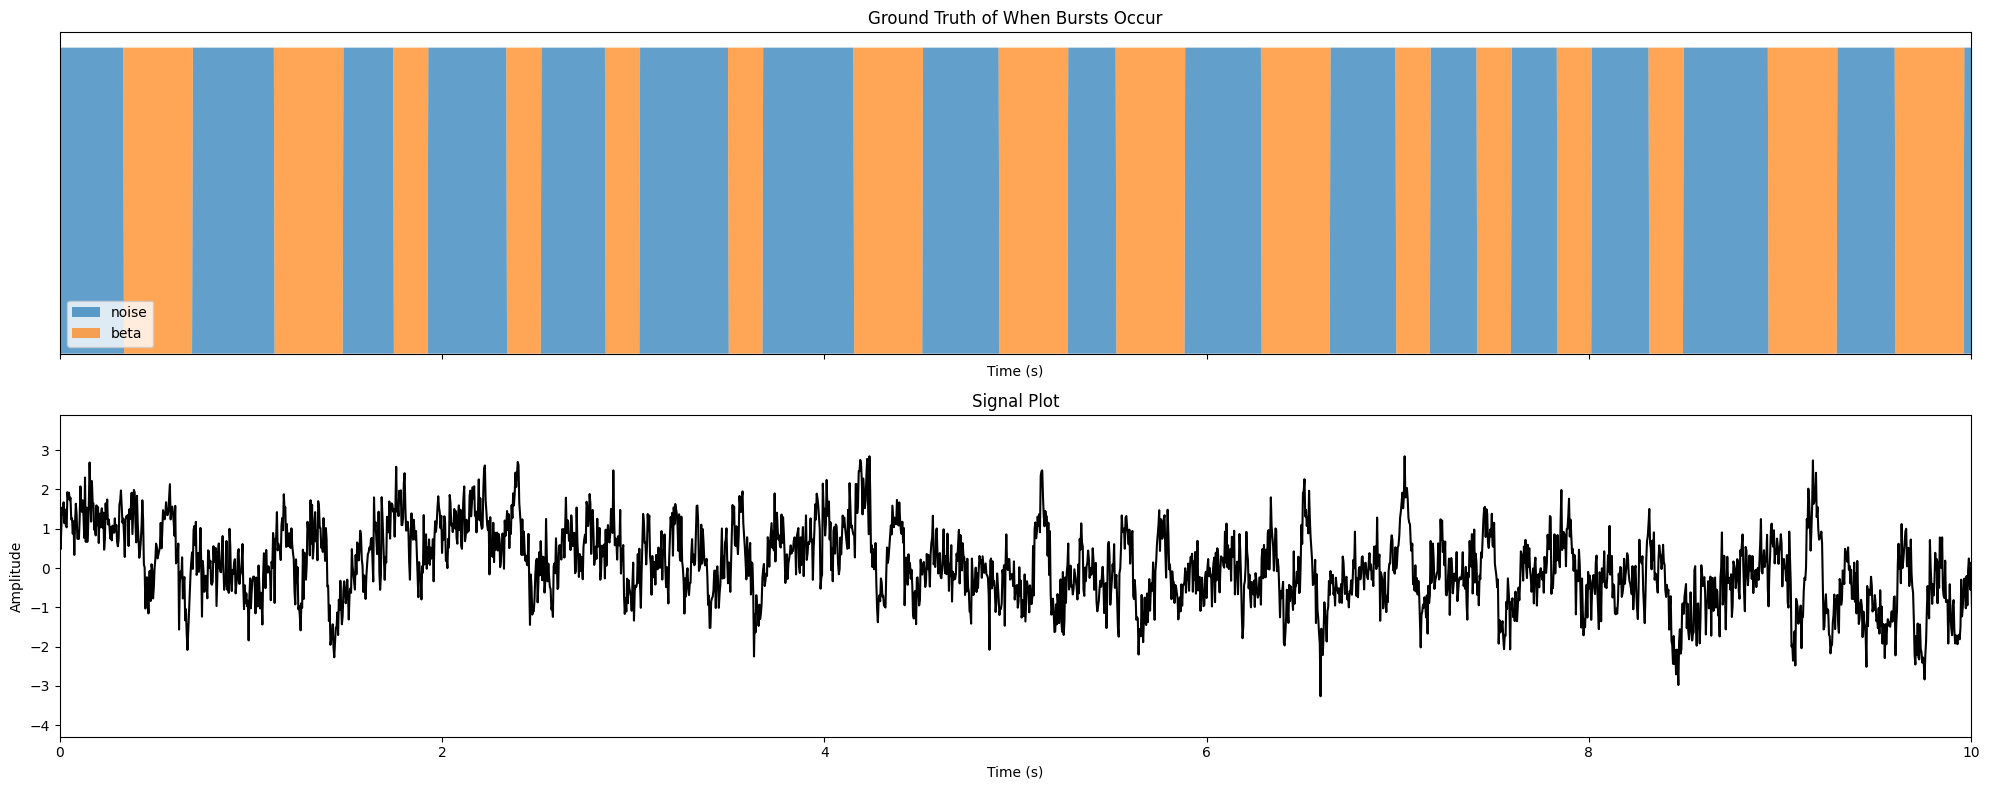

In [134]:
sample_number = 2
noise_level = 1

label_sample_low = combined_data_dict["all_features_multi"]["y_test"][sample_number, noise_level].flatten()
signal_sample_low = combined_data_dict["all_features_multi"]["X_test"][sample_number, noise_level, : , 0].flatten()

du.visualize_training_data(label_sample_low, signal_sample_low, duration=30)

In [105]:
au.explain_dict_structure(combined_data_dict)

all_features_multi:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   X_test:
      Shape: (1, 1, 5, 7500, 25)
   y_test:
      Shape: (1, 1, 5, 7500)

signal_multi:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   X_test:
      Shape: (1, 1, 5, 7500, 1)
   y_test:
      Shape: (1, 1, 5, 7500)

hilbert_only_multi:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   X_test:
      Shape: (1, 1, 5, 7500, 4)
   y_test:
      Shape: (1, 1, 5, 7500)

hilbert_included_multi:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   X_test:
      Shape: (1, 1, 5, 7500, 5)
   y_test:
      Shape: (1, 1, 5, 7500)

wavelet_only_multi:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   X_test:
      Shape: (1, 1, 5, 7500, 20)
   y_test:
      Shape: (1, 1, 5, 7500)

wavelet_inlcuded_multi:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   X_test:
      Shape: (1, 1,

In [106]:
# THIS ONLY WOKRS WITH A SPECIFC TYPE OF TESTING DATA SHAPE
# (n_samples,n_freqs, noise_ratios, timesteps, Features)
# (2,20,5,7500,25)

extracted_data_dict = extract_hidden_data_from_trained_models(combined_data_dict)

Extracting data for split: all_features_multi
Detected LSTM Layer: lstm_layer
Original testing_data shape: (1, 1, 5, 7500, 25)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Extracting data for split: signal_multi
Detected LSTM Layer: lstm_layer
Original testing_data shape: (1, 1, 5, 7500, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
Extracting data for split: hilbert_only_multi
Detected LSTM Layer: lstm_layer
Original testing_data shape: (1, 1, 5, 7500, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
Extracting data for split: hilbert_included_multi
Detected LSTM Layer: lstm_layer
Original testing_data shape: (1, 1, 5, 7500, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
Extracting data for split: wavelet_only_multi
Detected LSTM Layer: lstm_layer
Original testing_data shape: (1, 1, 5, 7500, 20)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━

In [107]:
au.explain_dict_structure(extracted_data_dict)

all_features_multi:
   hidden_states_activation:
      Shape: (1, 1, 5, 7500, 32)
   model_predictions:
      Shape: (1, 1, 5, 7500, 5)
   final_hidden_states:
      Shape: (1, 1, 5, 32)
   final_cell_states:
      Shape: (1, 1, 5, 32)
   dense_weights:
      Shape: (32, 5)
   dense_bias:
      Shape: (5,)

signal_multi:
   hidden_states_activation:
      Shape: (1, 1, 5, 7500, 32)
   model_predictions:
      Shape: (1, 1, 5, 7500, 5)
   final_hidden_states:
      Shape: (1, 1, 5, 32)
   final_cell_states:
      Shape: (1, 1, 5, 32)
   dense_weights:
      Shape: (32, 5)
   dense_bias:
      Shape: (5,)

hilbert_only_multi:
   hidden_states_activation:
      Shape: (1, 1, 5, 7500, 32)
   model_predictions:
      Shape: (1, 1, 5, 7500, 5)
   final_hidden_states:
      Shape: (1, 1, 5, 32)
   final_cell_states:
      Shape: (1, 1, 5, 32)
   dense_weights:
      Shape: (32, 5)
   dense_bias:
      Shape: (5,)

hilbert_included_multi:
   hidden_states_activation:
      Shape: (1, 1, 5, 750

In [ ]:
temp_tuple = combined_data_dict['beta_binary_signal_deep']['X_test']

In [108]:
combined_data_dict.keys()

dict_keys(['all_features_multi', 'signal_multi', 'hilbert_only_multi', 'hilbert_included_multi', 'wavelet_only_multi', 'wavelet_inlcuded_multi'])

In [71]:
for i, item in enumerate(temp_tuple):
    print(f"Shape of item {i}: {item.shape}")

NameError: name 'temp_tuple' is not defined

In [109]:
extracted_data_dict['beta_binary_signal_deep'].keys()

KeyError: 'beta_binary_signal_deep'

Signal Sample Shape: (7500,)
Label Sample Shape: (7500,)
Feature Sample Shape: (7500, 5)


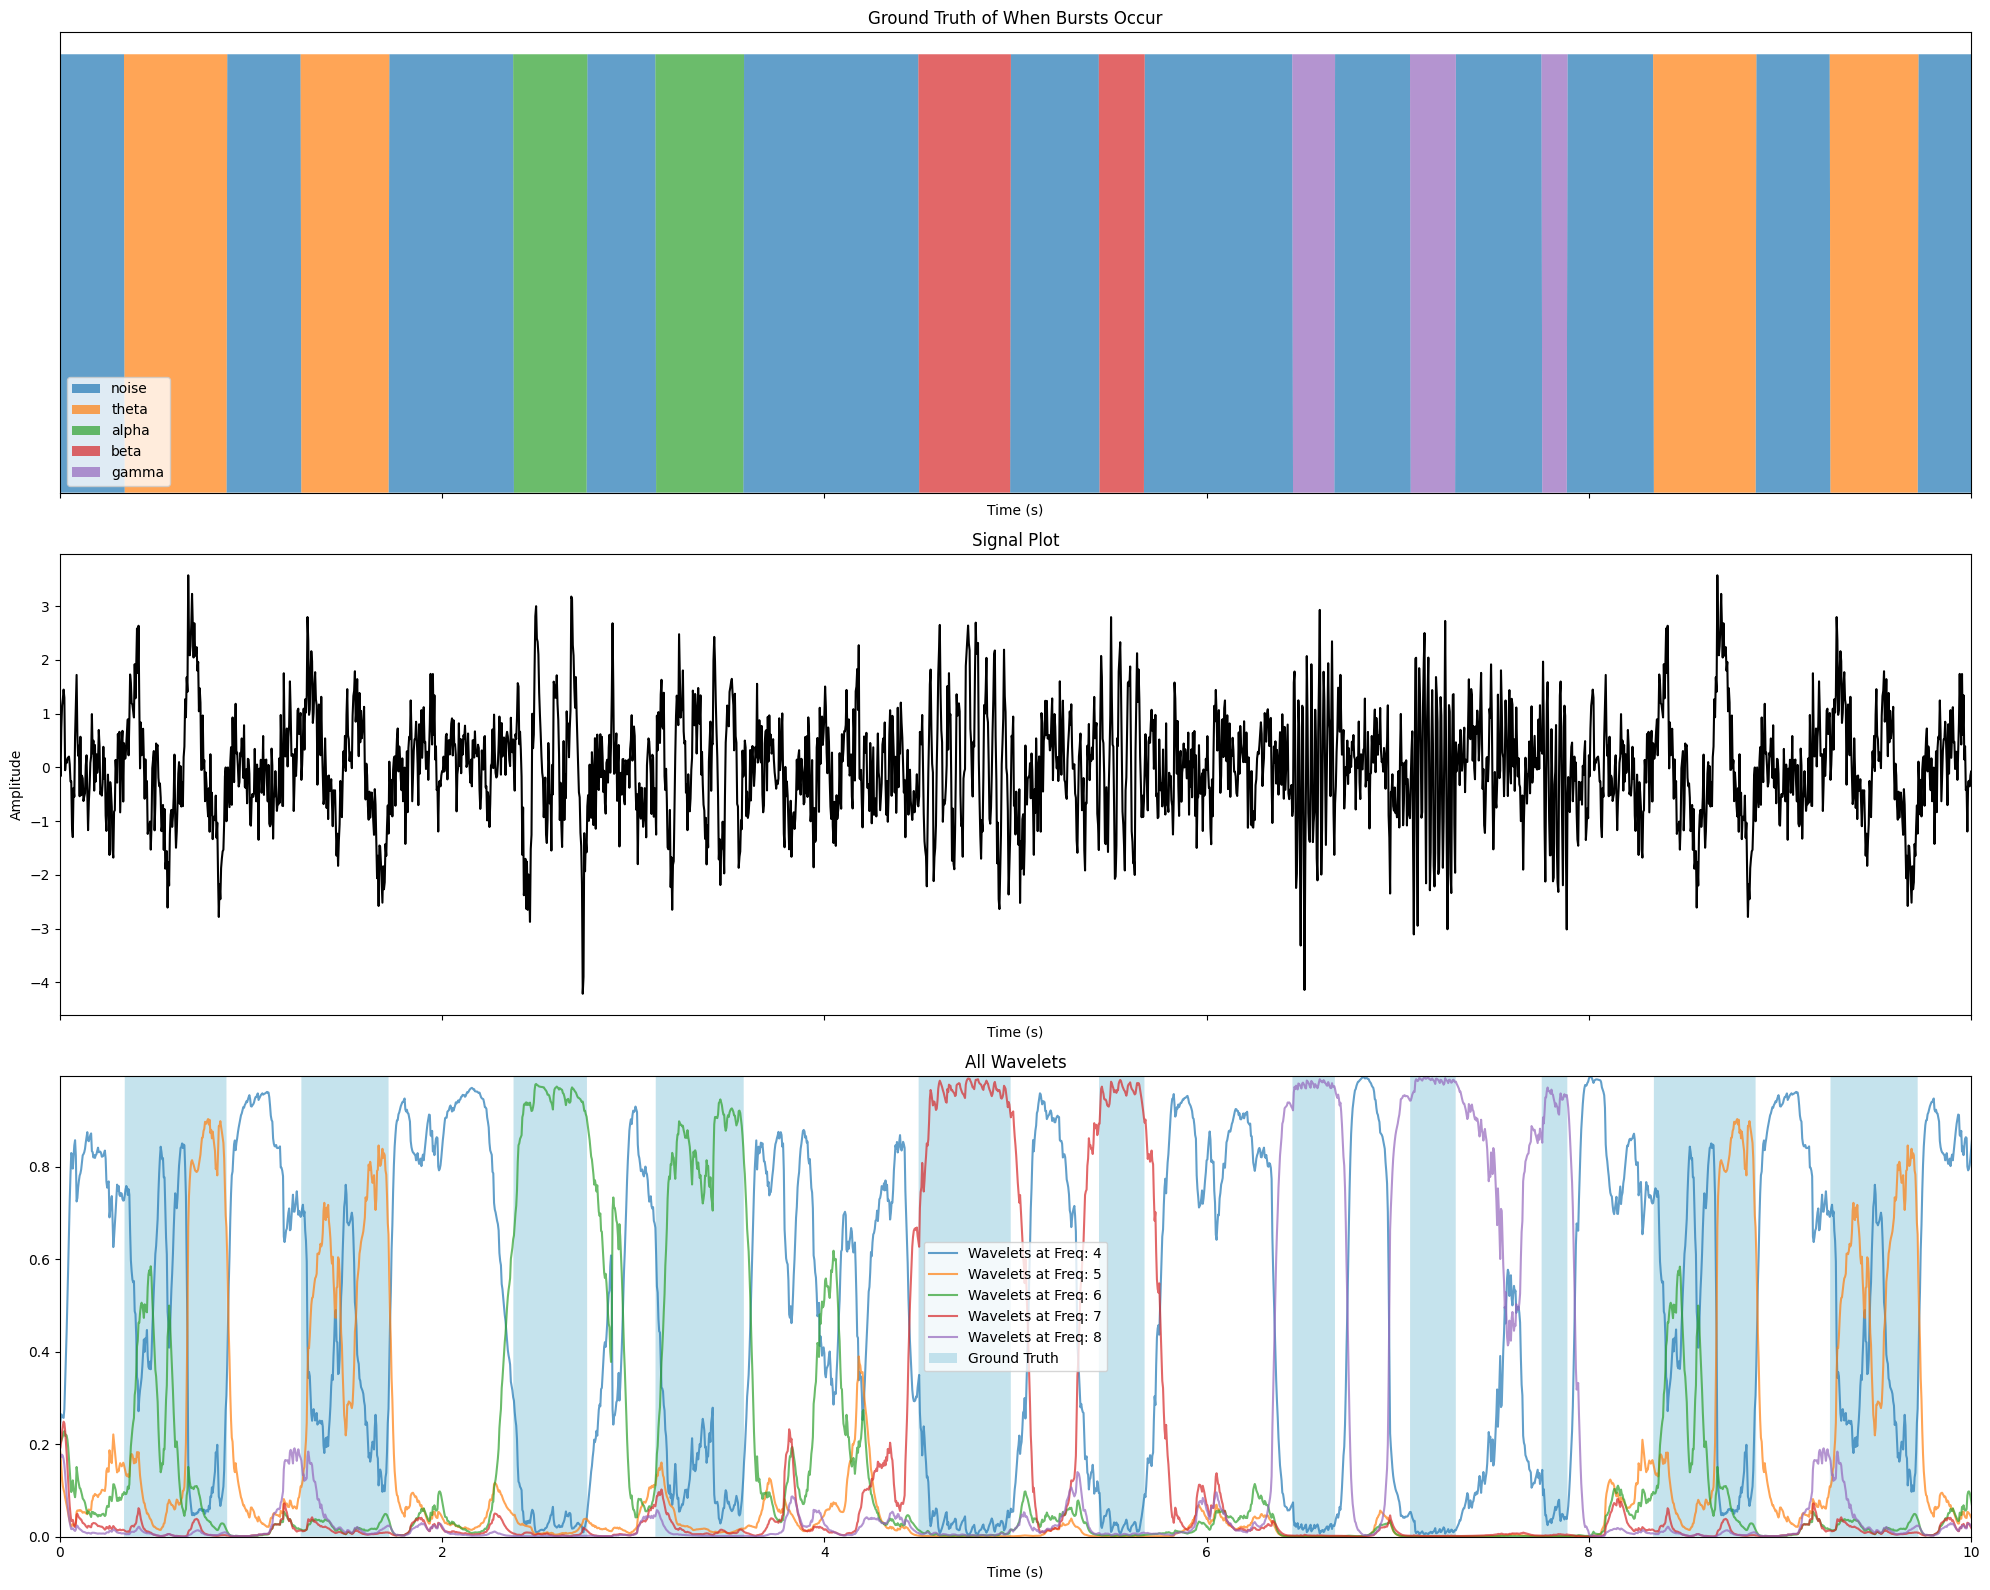

In [111]:
# Test if it worked correctly
sample = 0
# freq = 15
noise = 2
signal_sample = combined_data_dict['hilbert_included_multi']['X_test'][0,sample, noise, : , 0].flatten()
label_sample = combined_data_dict['hilbert_included_multi']['y_test'][0,sample, noise].flatten()
feature_sample = extracted_data_dict['hilbert_included_multi']['model_predictions'][0,sample, noise, :, :]

# Define category labels (adjust if you have different categories)
category_labels = ['noise', 'theta', 'alpha', 'beta', 'gamma']

print(f"Signal Sample Shape: {signal_sample.shape}")
print(f"Label Sample Shape: {label_sample.shape}")
print(f"Feature Sample Shape: {feature_sample.shape}")

du.visualize_feature_data(signal_sample=signal_sample, label_sample=label_sample, feature_sample=feature_sample, category_labels=category_labels, duration=30)

In [112]:
multi_path

'/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/LSTM Analysis Data/Multi_Models_and_Performances/New/'

In [113]:
# Example usage:
save_path = f'{multi_path}/special_LSTM_hidden_data.pkl'  # Specify your desired path

du.save_extracted_data(extracted_data_dict, save_path)


Extracted data saved to: /content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Data/LSTM Analysis Data/Multi_Models_and_Performances/New//special_LSTM_hidden_data.pkl


## Loading/Saving epoch Models included

In [ ]:
# Set False if we don't want to look at the models development over time
loaded_models_epochs = load_models_from_directory(binary_final_directory, intermediate=True)

In [ ]:
loaded_models_epochs

{'beta_binary_hilbert_only': {'model': <Functional name=beta_binary_hilbert_only, built=True>,
  'epoch_models': [<Functional name=epoch_40.h5, built=True>,
   <Functional name=epoch_30.h5, built=True>,
   <Functional name=epoch_35.h5, built=True>,
   <Functional name=epoch_20.h5, built=True>,
   <Functional name=epoch_25.h5, built=True>,
   <Functional name=epoch_10.h5, built=True>,
   <Functional name=epoch_15.h5, built=True>,
   <Functional name=epoch_5.h5, built=True>,
   <Functional name=epoch_1.h5, built=True>]},
 'beta_binary_signal': {'model': <Functional name=beta_binary_signal, built=True>,
  'epoch_models': [<Functional name=epoch_40.h5, built=True>,
   <Functional name=epoch_30.h5, built=True>,
   <Functional name=epoch_35.h5, built=True>,
   <Functional name=epoch_25.h5, built=True>,
   <Functional name=epoch_20.h5, built=True>,
   <Functional name=epoch_5.h5, built=True>,
   <Functional name=epoch_15.h5, built=True>,
   <Functional name=epoch_10.h5, built=True>,
   <Funct

In [ ]:
combined_data_dict_epochs = {}
for key in loaded_models_epochs:  # Assuming dict1 and dict2 have the same keys
        combined_data_dict_epochs[key] = loaded_models_epochs[key].copy()  # Start with values from dict1
        combined_data_dict_epochs[key].update(restructured_data_dict[key])   # Add/update with values from dict2

In [ ]:
au.explain_dict_structure(combined_data_dict_epochs)

beta_binary_hilbert_only:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   epoch_models:
      Type: <class 'list'>
   X_test:
      Shape: (10, 5, 7500, 1)
   y_test:
      Shape: (10, 5, 7500)

beta_binary_signal:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   epoch_models:
      Type: <class 'list'>
   X_test:
      Shape: (10, 5, 7500, 1)
   y_test:
      Shape: (10, 5, 7500)

beta_binary_all_features:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   epoch_models:
      Type: <class 'list'>
   X_test:
      Shape: (10, 5, 7500, 7)
   y_test:
      Shape: (10, 5, 7500)

beta_binary_wavelet_included:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   epoch_models:
      Type: <class 'list'>
   X_test:
      Shape: (10, 5, 7500, 6)
   y_test:
      Shape: (10, 5, 7500)

beta_binary_hilbert_included:
   model:
      Type: <class 'keras.src.models.functional.Functional'>
   epoch_models:


In [ ]:
# combined_data_dict_epochs = add_model_to_data_dict(restructured_data_dict, loaded_models_epochs)

In [ ]:
signal_sample = beta_binary_hilbert_only[]

In [ ]:
# THIS ONLY WOKRS WITH A SPECIFC TYPE OF TESTING DATA SHAPE
# (n_samples,n_freqs, noise_ratios, timesteps, Features)
# (2,20,5,7500,25)

# RETURNS DIFFERENT SHAPES
# (epochs, samples, freqs, noise_ratios_)

extracted_data_dict_epochs = extract_hidden_data_from_trained_models(combined_data_dict_epochs, epoch_models=True)

Extracting data for split: beta_binary_hilbert_only
Working with Epochs
Original Shape: (10, 5, 7500, 1)
Reshaped input data shape: (50, 7500, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 981ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Hidden States Shape: (10, 5, 7500, 32)
model_pred Shape: (10, 5, 7500, 1)
Hidden State Output Shape: (10, 5, 32)
Cell State Output Shape: (10, 5, 32)
Dense Weights Output Shape: (32, 1)
Dense Bias Output Shape: (1,)
Hidden States Shape: (9, 10, 5, 7500, 32)
model_pred Shape: (9, 10, 5, 7500, 1)
Hidden State Output Shape: (9, 10, 5, 32)
Cell State Output Shape: (9, 10, 5, 32)
Dense Weights Output Shape: (9, 32, 1)
Dense Bias Output Shape: (9, 1)
Original Shape: (10, 5, 7500, 1)
Reshaped input data shape: (50, 7500, 1)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step
Hidden States Shape: (10, 5, 7500, 32)
model_pred Shape: (10, 5, 7500, 1)
Hidden State Output Shape: (10, 5, 32)
Cell State Output Shape: (10, 5, 32)
Dense Weights Output Shape: (32, 1)
Dense Bias Output Shape: (1,)
Original Shape: (10, 5, 7500, 1)
Reshaped input data shape: (50, 7500, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
Hidden States Shape: (10, 5, 7500, 32)
model_pred Shape: (10, 5, 7500, 1)
Hidden State Output Shape: (10, 5, 32)
Cell State Output Shape: (10, 5, 32)
Dense Weights Output Shape: (32, 1)
Dense Bias Output Shape: (1,)
Original Shape: (10, 5, 7500, 1)
Reshaped input data shape: (50, 7500, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 962ms/step
Hidden States Shape: (10, 5, 7500, 32)
model_pred Shape: (10, 5, 7500, 1)
Hidden State Output Shape: (10, 5, 32)
Cell State Output Shape: (10, 5, 32)
Dense Weights Output Shape: (32, 1)


In [ ]:
au.explain_dict_structure(extracted_data_dict_epochs)

beta_binary_hilbert_only:
   hidden_states_activation:
      Shape: (9, 10, 5, 7500, 32)
   epoch_model_predictions:
      Shape: (9, 10, 5, 7500, 1)
   final_hidden_states:
      Shape: (9, 10, 5, 32)
   final_cell_states:
      Shape: (9, 10, 5, 32)
   dense_weights:
      Shape: (9, 32, 1)
   dense_bias:
      Shape: (9, 1)

beta_binary_signal:
   hidden_states_activation:
      Shape: (9, 10, 5, 7500, 32)
   epoch_model_predictions:
      Shape: (9, 10, 5, 7500, 1)
   final_hidden_states:
      Shape: (9, 10, 5, 32)
   final_cell_states:
      Shape: (9, 10, 5, 32)
   dense_weights:
      Shape: (9, 32, 1)
   dense_bias:
      Shape: (9, 1)

beta_binary_all_features:
   hidden_states_activation:
      Shape: (9, 10, 5, 7500, 32)
   epoch_model_predictions:
      Shape: (9, 10, 5, 7500, 1)
   final_hidden_states:
      Shape: (9, 10, 5, 32)
   final_cell_states:
      Shape: (9, 10, 5, 32)
   dense_weights:
      Shape: (9, 32, 1)
   dense_bias:
      Shape: (9, 1)

beta_binary_wave

Signal Sample Shape: (7500,)
Label Sample Shape: (7500,)
Feature Sample Shape: (7500, 5)


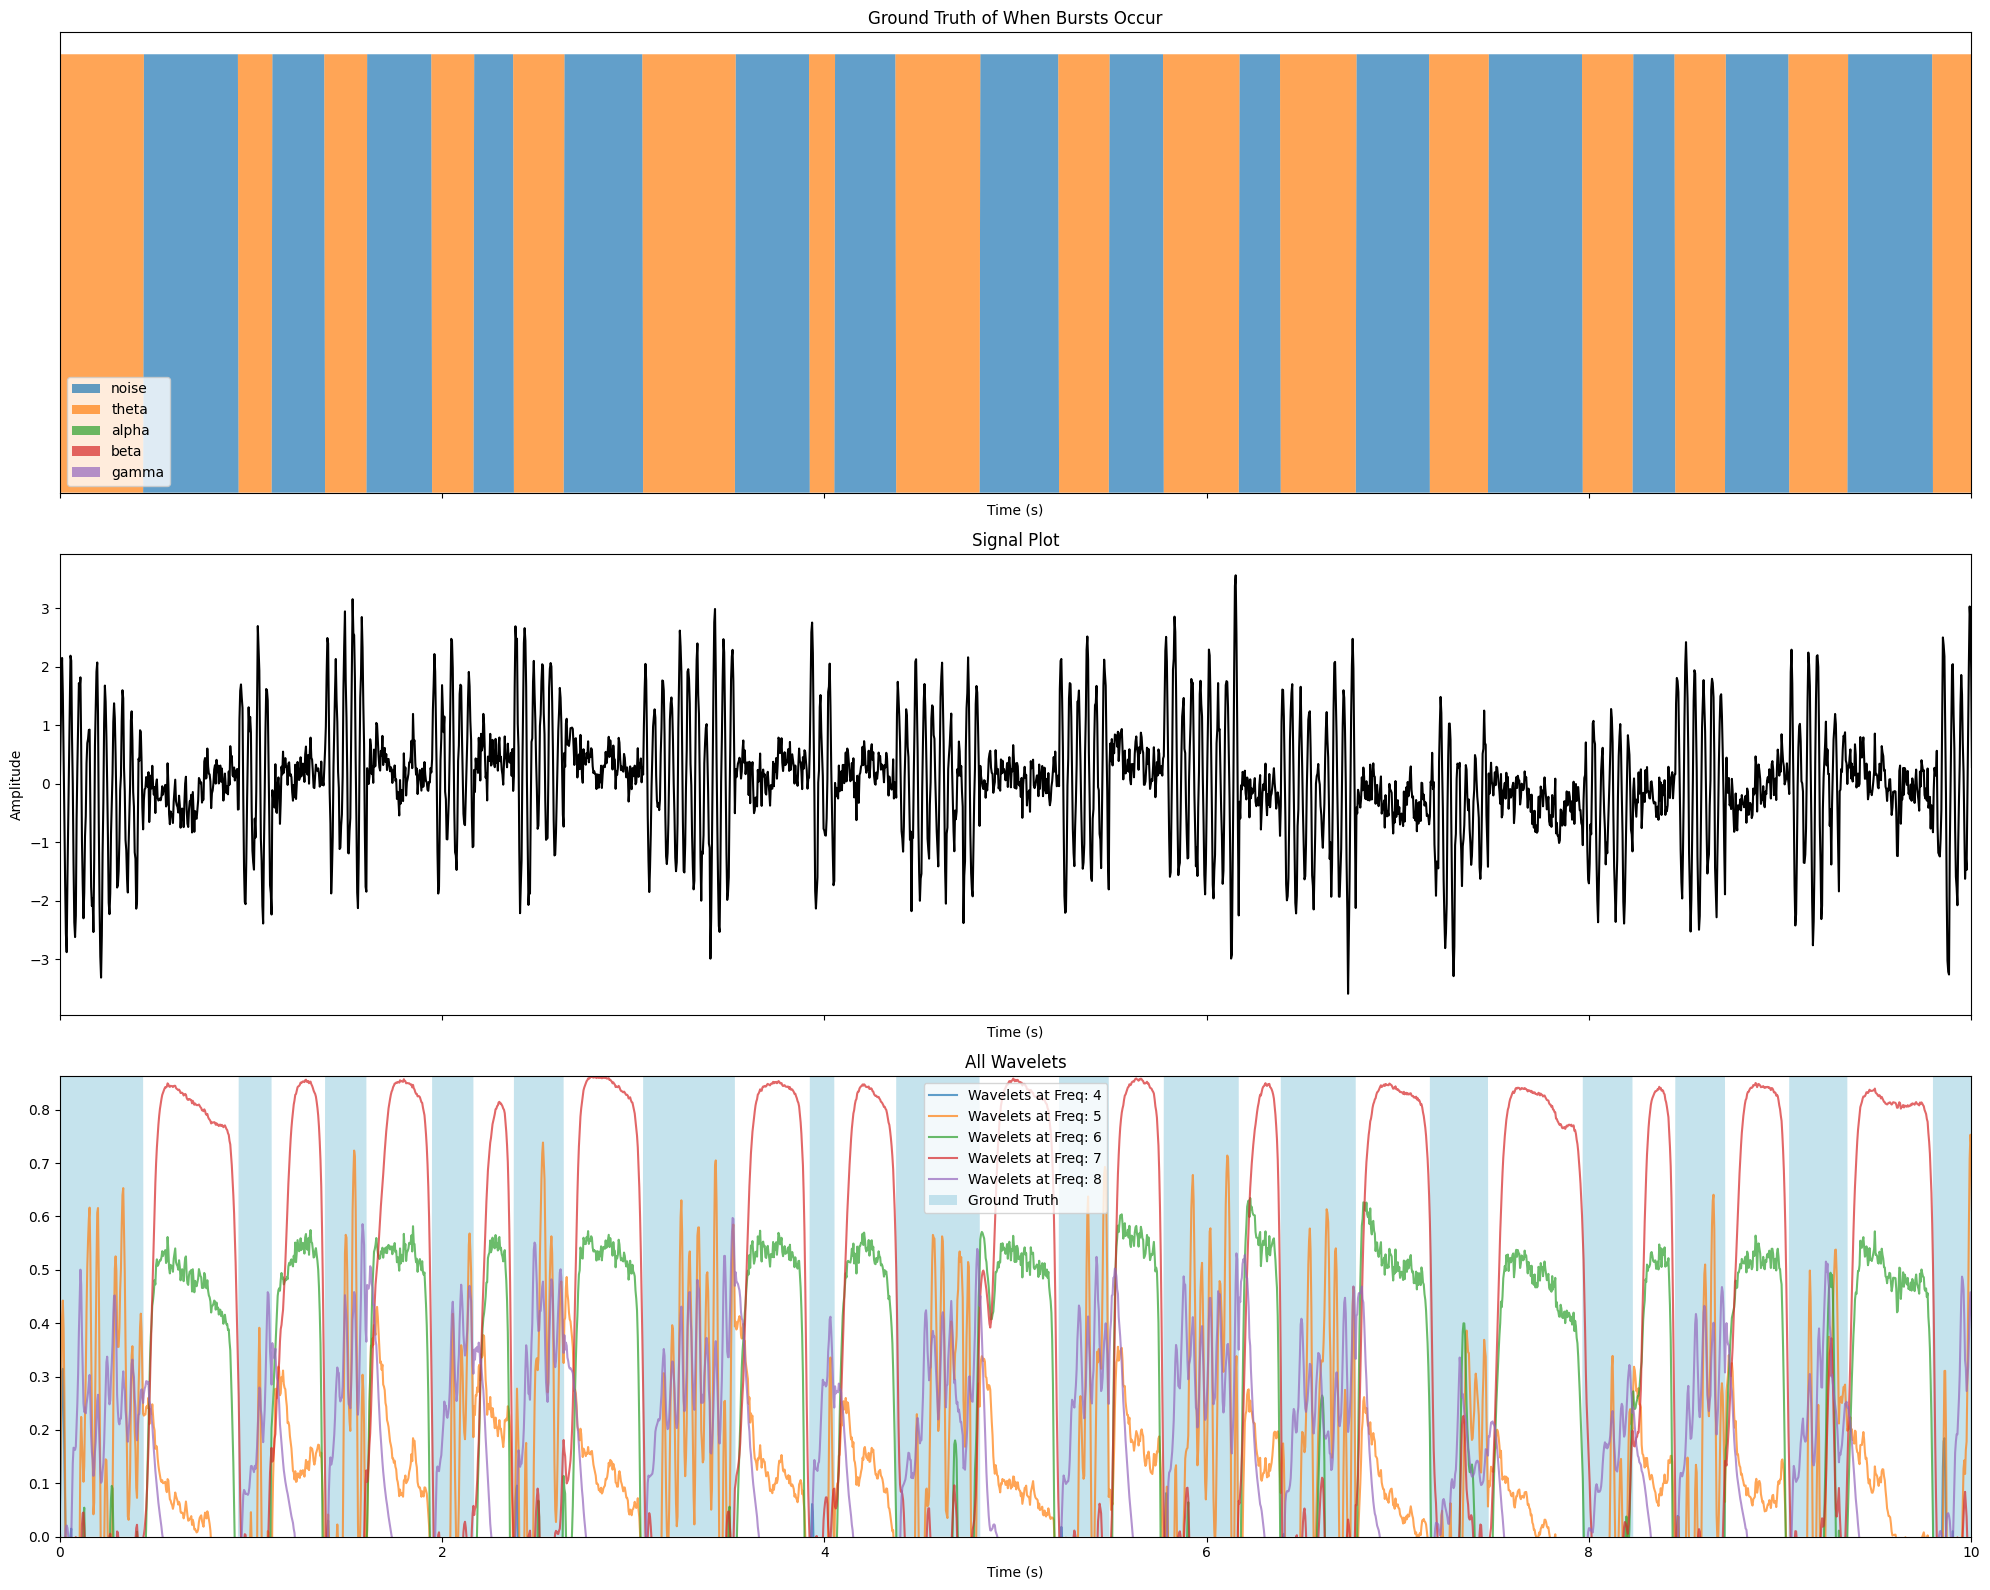

In [ ]:
# Test if it worked correctly
epoch = 3
sample = 0
freq = 8
noise = 4
signal_sample = combined_data_dict_epochs['beta_binary_wavelet_included']['X_test'][freq,noise, : , 0].flatten()
label_sample = combined_data_dict_epochs['beta_binary_wavelet_included']['y_test'][freq, noise].flatten()
feature_sample = extracted_data_dict_epochs['beta_binary_wavelet_included']['hidden_states_activation'][epoch,freq,noise, :, :5]

# Define category labels (adjust if you have different categories)
category_labels = ['noise', 'theta', 'alpha', 'beta', 'gamma']

print(f"Signal Sample Shape: {signal_sample.shape}")
print(f"Label Sample Shape: {label_sample.shape}")
print(f"Feature Sample Shape: {feature_sample.shape}")

du.visualize_feature_data(signal_sample=signal_sample, label_sample=label_sample, feature_sample=feature_sample, category_labels=category_labels, duration=30)

Instead of picking up a constant activation during oscillation, it is easier to suppress the cell activation during oscillations and increase activation during noise phases.

In [ ]:
# Example usage:
save_path = f'{binary_path}/epoch_analysis_LSTM_hidden_data_single.pkl'  # Specify your desired path

du.save_extracted_data(extracted_data_dict_epochs, save_path)